In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置出版级绘图风格
plt.rcParams.update({
    # "font.family": "serif",          # 使用衬线字体 (类似 Times New Roman)
    # "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 14,                 # 全局字号
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "xtick.direction": "in",         # 刻度朝内
    "ytick.direction": "in",
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "figure.figsize": (6, 5),        # 图片默认大小
    # "mathtext.fontset": "cm"         # 数学公式使用 Computer Modern 字体
})

Reading data from ../data/beta_test_L24_J0.8_imp0.04/summary_all.csv...
Plotting Order Parameters...


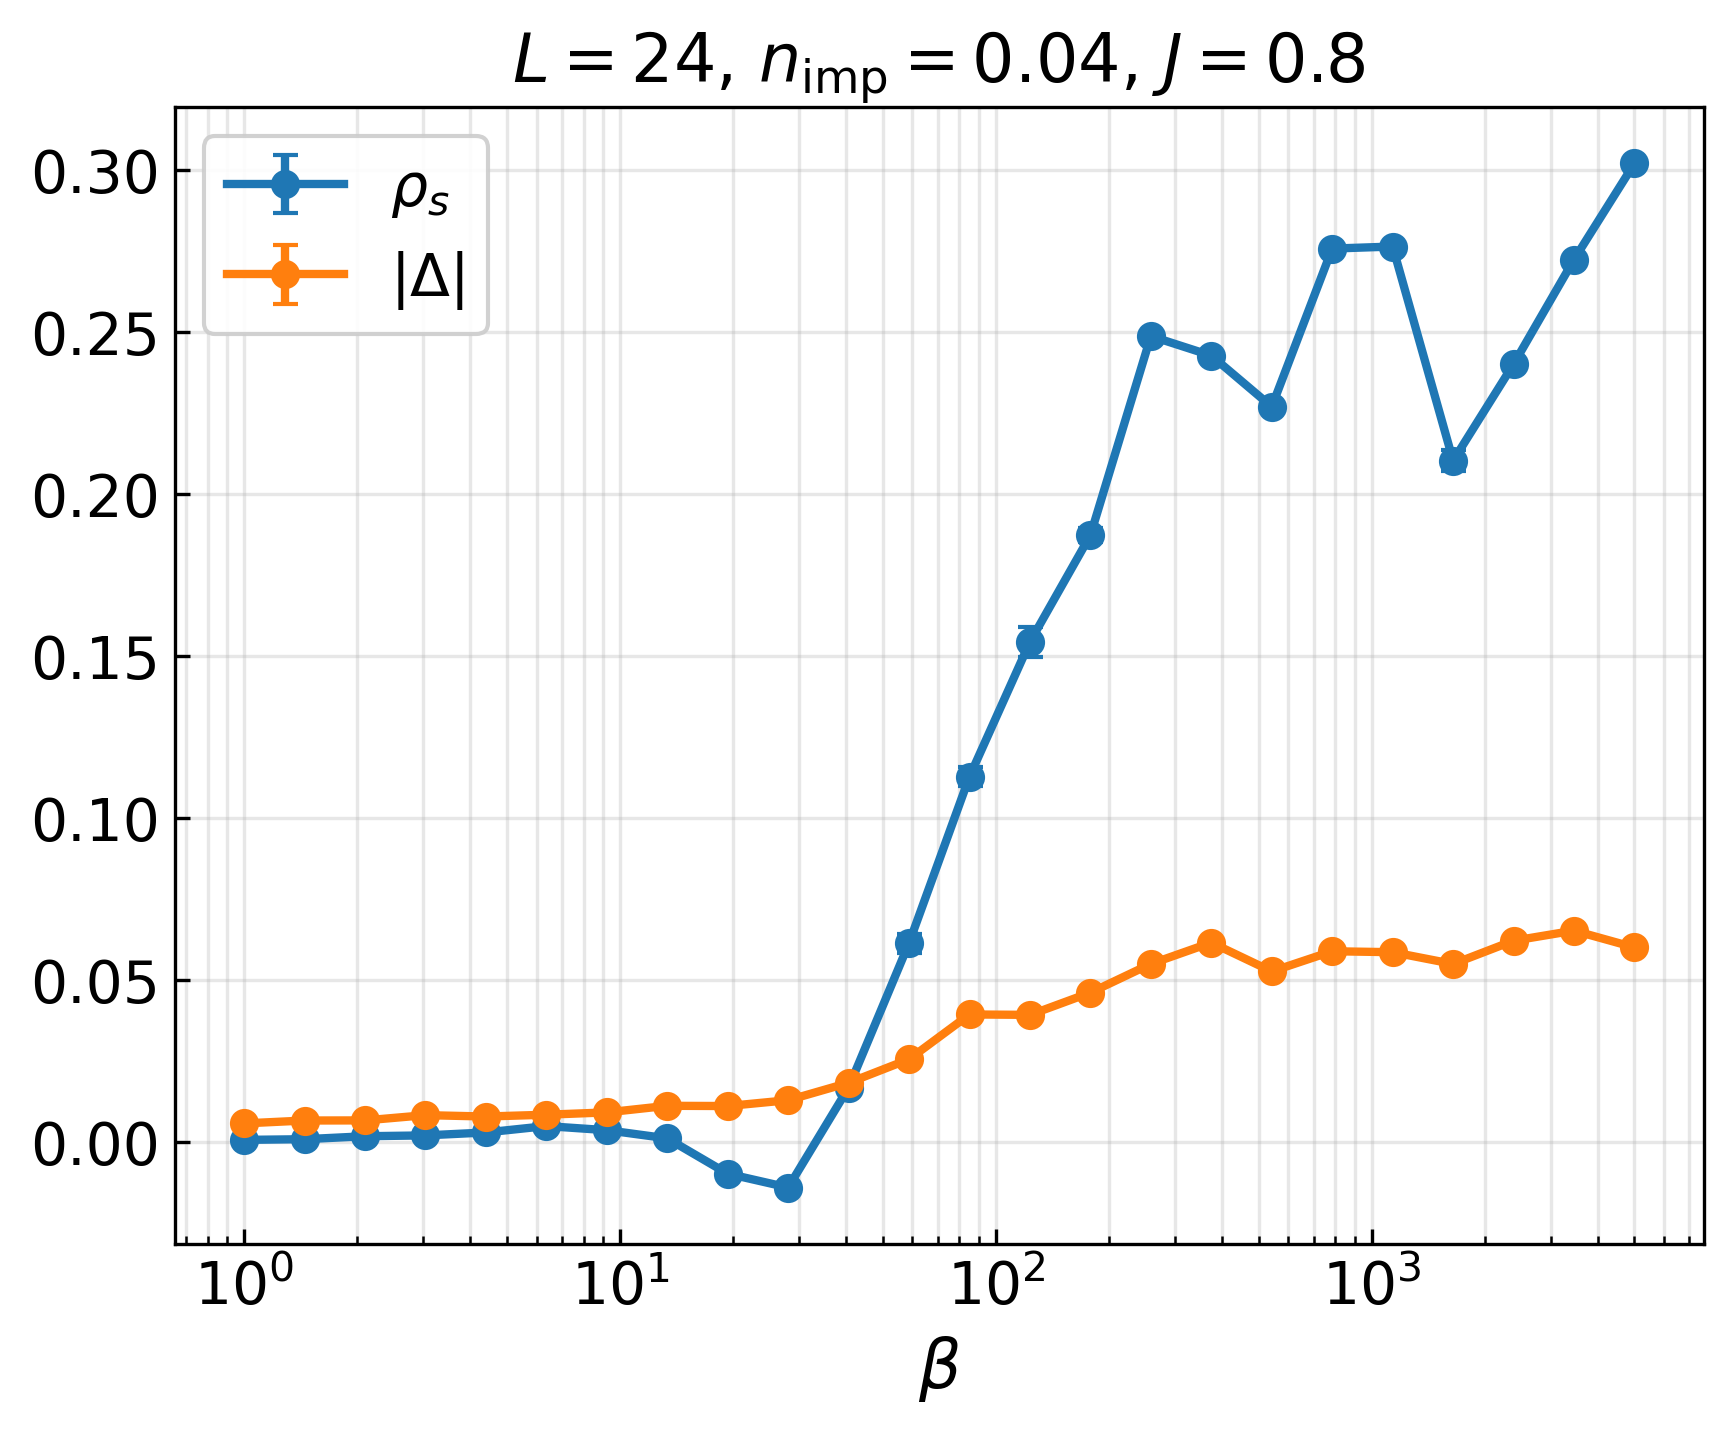

In [90]:
L = 24
J = 0.8
n_imp = 0.04
csv_file = f"../data/beta_test_L{L}_J{J}_imp{n_imp}/summary_all.csv"

# ==========================================
# 读取数据
# ==========================================
if not os.path.exists(csv_file):
    print(f"Error: {csv_file} not found.")
    exit(1)

print(f"Reading data from {csv_file}...")
df = pd.read_csv(csv_file)

# 数据列名参考:
# Beta,Rho_s_mean,Rho_s_err,Delta_mean,Delta_err,sigma_mean,sigma_err
# or
# T,Beta,Accepted_err,Accepted_mean,DC_Conductivity_err,DC_Conductivity_mean,Delta_Amp_err,Delta_Amp_mean,Delta_Diff_err,Delta_Diff_mean,Delta_Glob_err,Delta_Glob_mean,Delta_Loc_err,Delta_Loc_mean,Delta_Pair_err,Delta_Pair_mean,Energy_err,Energy_mean,Hole_p_err,Hole_p_mean,S_Delta_err,S_Delta_mean,Superfluid_Stiffness_err,Superfluid_Stiffness_mean,dH_err,dH_mean

# 定义自定义 X 轴刻度
custom_xticks = [1, 10, 100, 1000]
custom_xticklabels = [r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"]

# ==========================================
# 图 1: Order Parameters (Values)
# ==========================================
print("Plotting Order Parameters...")
fig, ax = plt.subplots(dpi=300)

ax.errorbar(df['Beta'], df['Superfluid_Stiffness_mean'], yerr=df['Superfluid_Stiffness_err'], 
            fmt='-o', capsize=3, label=r'$\rho_s$', color='tab:blue', zorder=3)
ax.errorbar(df['Beta'], df['Delta_Pair_mean'], yerr=df['Delta_Pair_err'], 
            fmt='-o', capsize=3, label=r'$|\Delta|$', color='tab:orange', zorder=3)
# ax.errorbar(df['Beta'], df['DC_Conductivity_mean'], yerr=df['DC_Conductivity_err'], 
#             fmt='-o', capsize=3, label=r'$\sigma(\omega=0)$', color='tab:green', zorder=3)
# ax.errorbar(df['Beta'], df['Hole_p_mean'], yerr=df['Hole_p_err'], 
#             fmt='-o', capsize=3, label=r'$p$', color='tab:red', zorder=3)

# 设置坐标轴
ax.set_xscale('log')
ax.set_xlabel(r'$\beta$')
# ax.set_ylabel(r'$\rho_s$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(0,0.38) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

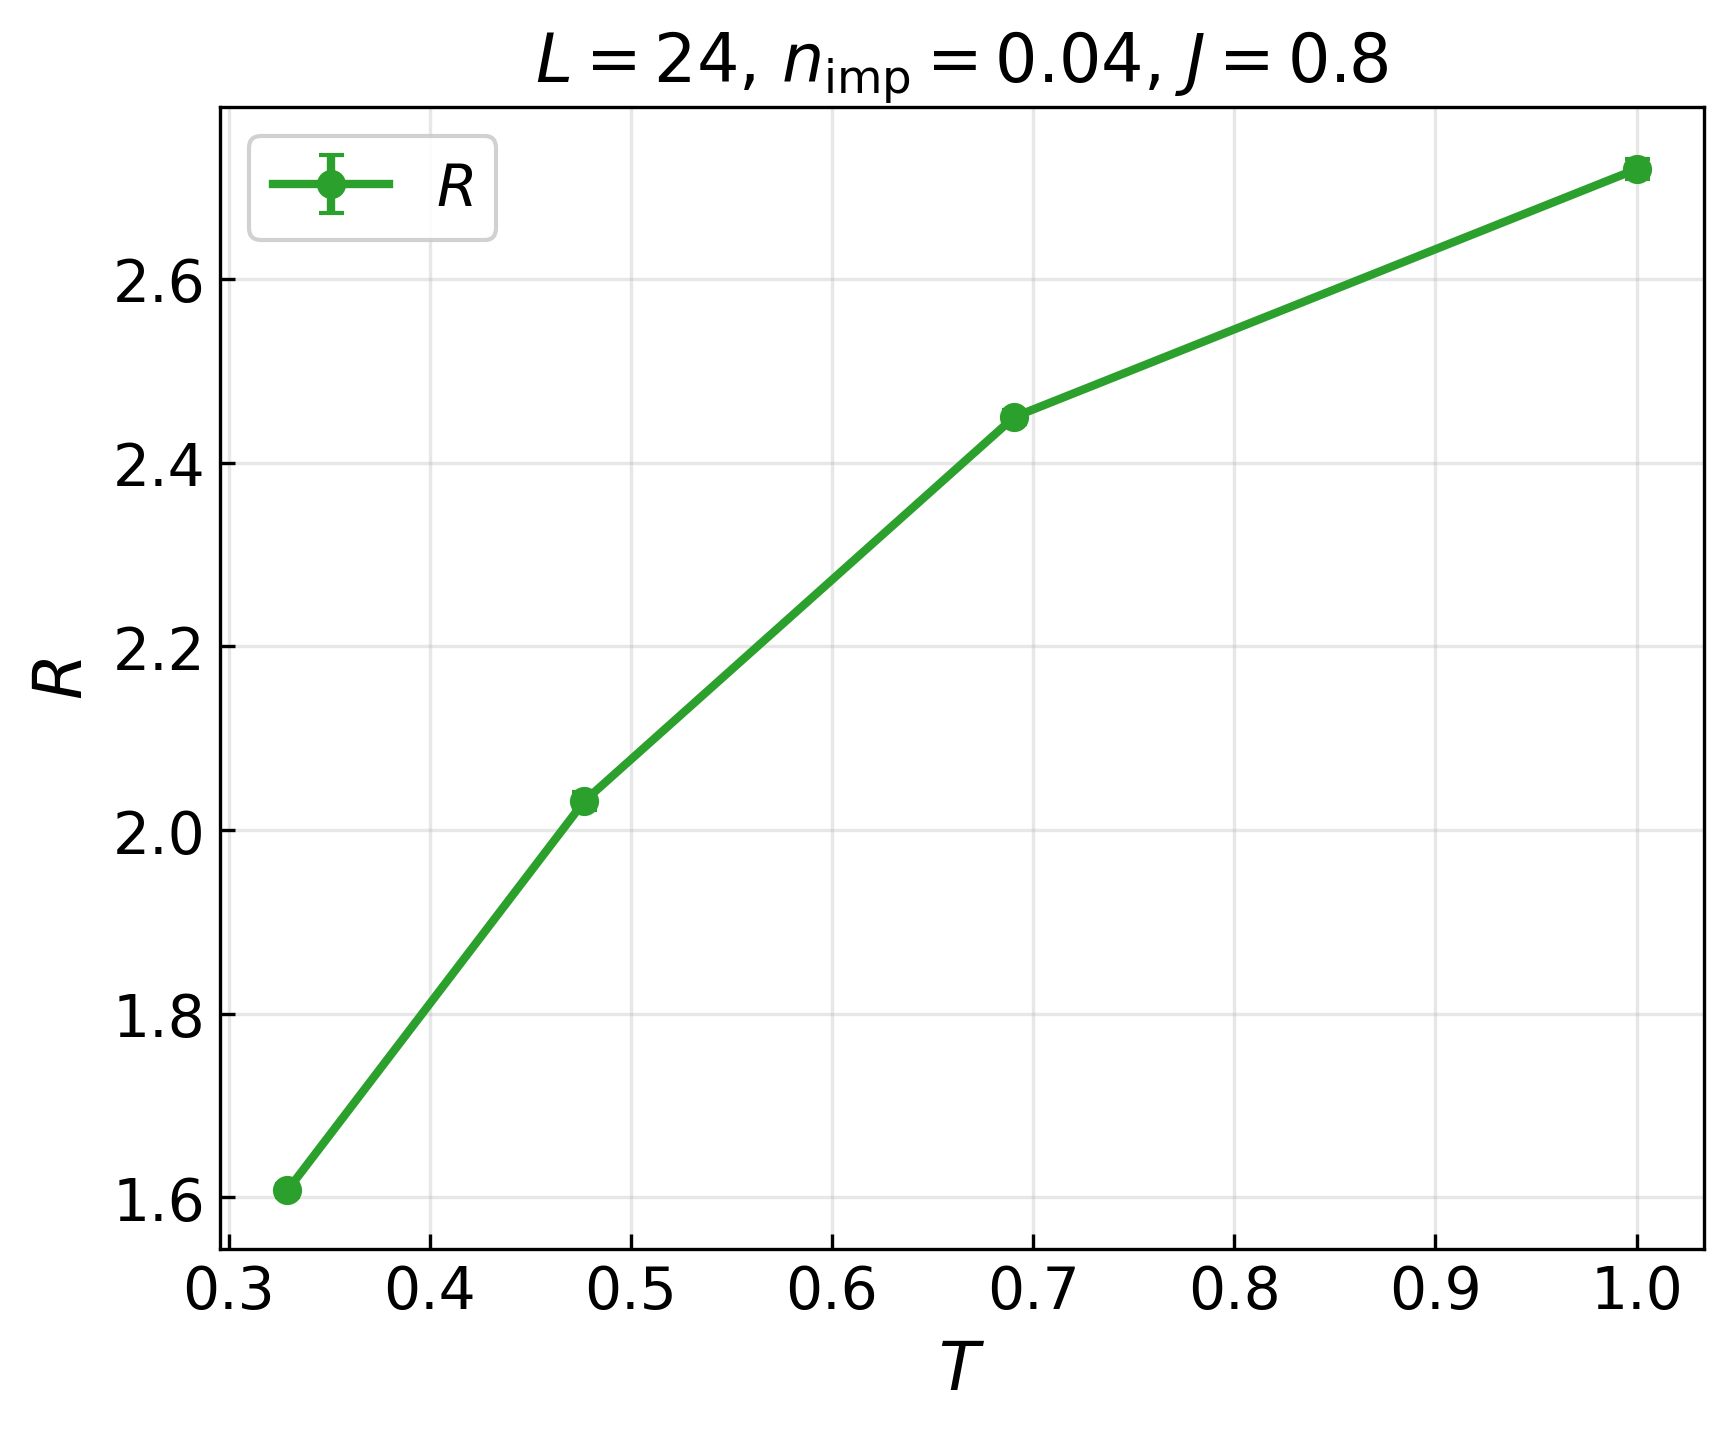

In [88]:
fig, ax = plt.subplots(dpi=300)

beta = df['Beta'][:4]
sigma = df['DC_Conductivity_mean'][:4]
sigma_err = df['DC_Conductivity_err'][:4]

T = 1 / beta
R = 1 / sigma
R_err = sigma_err / (sigma**2)


ax.errorbar(T, R, yerr=R_err, 
            fmt='-o', capsize=3, label=r'$R$', color='tab:green', zorder=3)

# 设置坐标轴
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$R$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(0,0.38) 

# 设置刻度
# ax.set_xticks(custom_xticks)
# ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()

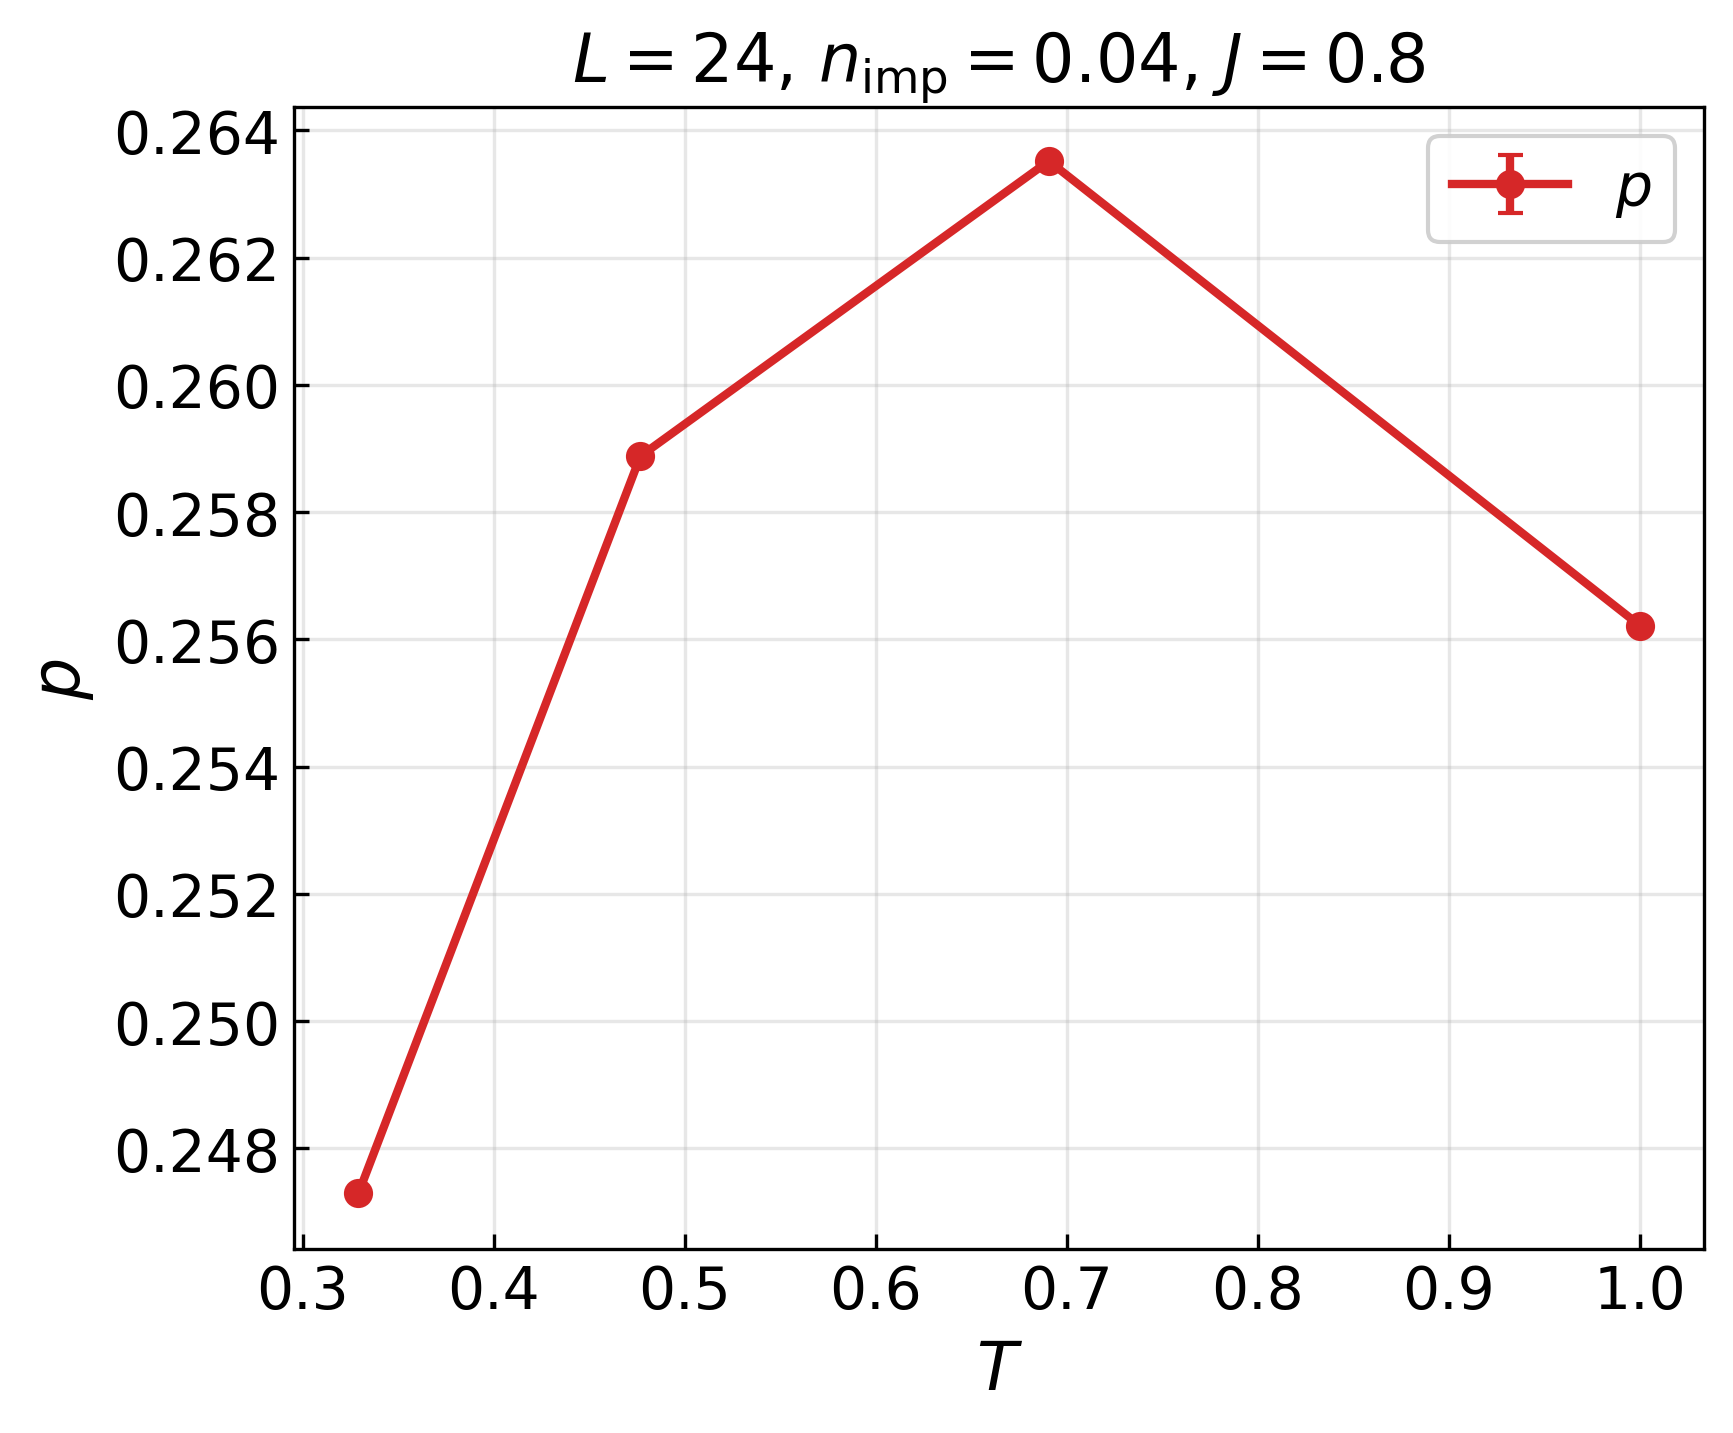

In [89]:
fig, ax = plt.subplots(dpi=300)

beta = df['Beta'][:4]
p = df['Hole_p_mean'][:4]
p_err = df['Hole_p_err'][:4]

T = 1 / beta


ax.errorbar(T, p, yerr=p_err, 
            fmt='-o', capsize=3, label=r'$p$', color='tab:red', zorder=3)

# 设置坐标轴
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$p$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
# ax.set_ylim(0,0.38) 

# 设置刻度
# ax.set_xticks(custom_xticks)
# ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()